# Кейc №3 - Задача регрессии 

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df_vehicles = pd.read_csv('vehicles.csv')

## Обработка и анализ данных

Обработка и анализ данных производились в отдельном ноутбуке. Далее представлены тезисные выводы по некоторым  атрибутам таблицы.

<b>Атрибуты 'Unnamed: 0', 'id',  'VIN', 'posting_date'</b> - являются уникальными и никаким образом на формирование цены не влияют. Спокойно можно их удалить из таблицы

<b>Атрибуты 'region_url', 'state','lat', 'long'</b> - показывают относительное расположение объявления по штату и координатам. Данное значение в большем объеме показывает атрибут 'region'

<b>Атрибуты 'image_url','description'</b> - являются наиболее важными с точки зрения заплнения пропусков и несут огромное кол-во полезной и важной информации. Вполне реально использовать методы машинного обучения для обработки и анализа текста, а так же для обработки изображений, с целью получения более полной информации об объявлении (например: состояние ТС, цвет кузова, тип кузова, привод и др.). Однако, ввиду ограниченности по времени и в знаниях, выполнить обработку данных ячеек не представляется возможным.

<b>Атрибут 'size'</b> - отображает габаритные размеры автомобиля, но не влияет на прямую на формирование цены, в отличие от типа кузова, к которому напрямую привязаны габариты автомобилей.  

In [3]:
df_vehicles.nunique(axis = 0)

Unnamed: 0      458213
id              458213
url             458213
region             405
region_url         413
price            16924
year               110
manufacturer        43
model            31520
condition            6
cylinders            8
fuel                 5
odometer        108135
title_status         6
transmission         3
VIN             133620
drive                3
size                 4
type                13
paint_color         12
image_url       285404
description     384347
state               51
lat              61179
long             61559
posting_date    423805
dtype: int64

In [4]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

### Удаление ненужных столбцов

In [5]:
df_vehicles = df_vehicles.drop(['Unnamed: 0', 'id', 'region_url', 'VIN', 'size', 'lat', 'long', 'posting_date', 'state', 'image_url','description' ], axis=1)

In [6]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           458213 non-null  object 
 1   region        458213 non-null  object 
 2   price         458213 non-null  int64  
 3   year          457163 non-null  float64
 4   manufacturer  439993 non-null  object 
 5   model         453367 non-null  object 
 6   condition     265273 non-null  object 
 7   cylinders     287073 non-null  object 
 8   fuel          454976 non-null  object 
 9   odometer      402910 non-null  float64
 10  title_status  455636 non-null  object 
 11  transmission  455771 non-null  object 
 12  drive         324025 non-null  object 
 13  type          345475 non-null  object 
 14  paint_color   317370 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 52.4+ MB


### Удаление пустых строк

Оставшиеся атрибуты напрямую влияют на финальную стоимость ТС. Особое внимание стоит уделить типу ТС. 

<b>Атрибут "type"</b> содержит более 100 000 пустых строк, которые не предоставляется возможности восстановить без применения альтернативных алгоритмов машинного обучения. Удалять столбец так же является не целесообразном решением. Поэтому, принято решение удалить все строки, содержащие пустые ячейки

In [7]:
df_vehicles = df_vehicles.dropna(subset=['type'],how = 'any', axis = 0)

In [8]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          344530 non-null  float64
 4   manufacturer  334940 non-null  object 
 5   model         343183 non-null  object 
 6   condition     226478 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          343299 non-null  object 
 9   odometer      327525 non-null  float64
 10  title_status  343888 non-null  object 
 11  transmission  343790 non-null  object 
 12  drive         285900 non-null  object 
 13  type          345475 non-null  object 
 14  paint_color   286962 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 42.2+ MB


Следующим этапом необходимо восстановить пропцщенные строки в атрибуте "condition". Данный атрибут отвечает за состояние ТС. Опытным путем было доказано, что атрибуты "condition" и "title_status" являются взаимосвязанными и практически идентичными (в какой-то мере столбец "title_status" является более приоритетным, нежели "condition", и более подробно описывает состояние ТС), поэтому, решено объеденить данные столбцы с цолью восстановления пустых ячеек

In [9]:
condition_dict = {'excellent':['excellent', 'new'],
                  'good':['good','like new']} 
for key,values in condition_dict.items():
    df_vehicles['condition'][df_vehicles['condition'].isin(values)] = key 

/var/folders/q4/p89x159x6hs05djns8vkm4600000gn/T/ipykernel_19762/3003441534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles['condition'][df_vehicles['condition'].isin(values)] = key


In [10]:
title_status_dict = {'salvage':['salvage', 'parts only'],
                     'fair':['missing'],
                    'good':['rebuilt', 'lien'],
                    'excellent':['clean']} 
for key,values in title_status_dict.items():
    df_vehicles['title_status'][df_vehicles['title_status'].isin(values)] = key 

/var/folders/q4/p89x159x6hs05djns8vkm4600000gn/T/ipykernel_19762/2020942993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles['title_status'][df_vehicles['title_status'].isin(values)] = key


In [11]:
df_vehicles.condition.fillna(df_vehicles.title_status, inplace=True)

In [12]:
df_vehicles.condition.fillna("fair", inplace=True)

In [13]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          344530 non-null  float64
 4   manufacturer  334940 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          343299 non-null  object 
 9   odometer      327525 non-null  float64
 10  title_status  343888 non-null  object 
 11  transmission  343790 non-null  object 
 12  drive         285900 non-null  object 
 13  type          345475 non-null  object 
 14  paint_color   286962 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 42.2+ MB


In [14]:
df_vehicles = df_vehicles.drop('title_status', axis=1)

<b>Атрибут "year"</b> содержит около 1000 пустых строк, которые вполне реально восстановить используя url адресс. Удалять пустые строки так же является не целесообразном решением. 

In [15]:
df_vehicles ['year_url'] = df_vehicles['url'].str.findall("[0-9]{4}").apply(lambda x: x[0])
df_vehicles ['year_url']

0               2010
1               2014
2               2006
3         7240103965
4               2005
             ...    
458206          2013
458208          2014
458209          2018
458210          2014
458211          2008
Name: year_url, Length: 345475, dtype: object

In [16]:
df_vehicles.year.fillna(df_vehicles.year_url, inplace=True)

In [17]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  334940 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          343299 non-null  object 
 9   odometer      327525 non-null  float64
 10  transmission  343790 non-null  object 
 11  drive         285900 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
 14  year_url      345475 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 42.2+ MB


In [18]:
df_vehicles = df_vehicles.drop('year_url', axis=1)

<b>Атрибут "manufacturer"</b> содержит данные о производителе. Около 1000 пустых строк, которые вполне реально восстановить используя model. Удалять пустые строки так же является не целесообразном решением. 

In [19]:
df_vehicles_copy = df_vehicles.copy()

In [20]:
df_vehicles_copy = df_vehicles_copy.replace(np.nan, 'unknown')

In [21]:
df_vehicles_copy = df_vehicles_copy.loc[df_vehicles_copy['manufacturer'] == 'unknown']
df_vehicles_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,38500,2019,unknown,500,excellent,8 cylinders,gas,28246.0,automatic,rwd,pickup,white
21,https://auburn.craigslist.org/cto/d/alexander-...,auburn,6500,2010.0,unknown,bmw328xi,excellent,6 cylinders,gas,149786.0,automatic,fwd,sedan,black
78,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,9998,2016.0,unknown,Scion iA,excellent,unknown,gas,81511.0,automatic,fwd,sedan,white
138,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,21990,2009.0,unknown,International DuraStar 4300,good,6 cylinders,diesel,59814.0,automatic,rwd,truck,white
140,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,27990,2016.0,unknown,Isuzu NPR HD GAS REG,good,8 cylinders,gas,107649.0,automatic,rwd,truck,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458118,https://madison.craigslist.org/cto/d/blue-moun...,madison,400,1977.0,unknown,MG Midget,fair,4 cylinders,gas,49000.0,manual,rwd,convertible,blue
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,unknown,32' 2 car trailer,good,unknown,other,100.0,other,unknown,other,black
458158,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,10590,2015.0,unknown,smart fortwo Pure Hatchback,good,unknown,gas,28842.0,automatic,rwd,coupe,white
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,unknown,3200,excellent,unknown,diesel,30526.0,automatic,unknown,bus,white


In [22]:
df_vehicles_copy['model_manuf'] = df_vehicles_copy['model'].str.findall('^(\w+)\D').transform(''.join)
df_vehicles_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,model_manuf
15,https://auburn.craigslist.org/ctd/d/royal-palm...,auburn,38500,2019,unknown,500,excellent,8 cylinders,gas,28246.0,automatic,rwd,pickup,white,
21,https://auburn.craigslist.org/cto/d/alexander-...,auburn,6500,2010.0,unknown,bmw328xi,excellent,6 cylinders,gas,149786.0,automatic,fwd,sedan,black,bmw328x
78,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,9998,2016.0,unknown,Scion iA,excellent,unknown,gas,81511.0,automatic,fwd,sedan,white,Scion
138,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,21990,2009.0,unknown,International DuraStar 4300,good,6 cylinders,diesel,59814.0,automatic,rwd,truck,white,International
140,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,27990,2016.0,unknown,Isuzu NPR HD GAS REG,good,8 cylinders,gas,107649.0,automatic,rwd,truck,white,Isuzu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458118,https://madison.craigslist.org/cto/d/blue-moun...,madison,400,1977.0,unknown,MG Midget,fair,4 cylinders,gas,49000.0,manual,rwd,convertible,blue,MG
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,unknown,32' 2 car trailer,good,unknown,other,100.0,other,unknown,other,black,32
458158,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,10590,2015.0,unknown,smart fortwo Pure Hatchback,good,unknown,gas,28842.0,automatic,rwd,coupe,white,smart
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,unknown,3200,excellent,unknown,diesel,30526.0,automatic,unknown,bus,white,


In [23]:
df_vehicles.manufacturer.fillna(df_vehicles_copy.model_manuf, inplace=True)

In [24]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          343299 non-null  object 
 9   odometer      327525 non-null  float64
 10  transmission  343790 non-null  object 
 11  drive         285900 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 39.5+ MB


<b>Атрибут "odometer"</b> содержит данные о километраже. Около 30 000 пустых строк, которые вполне реально восстановить используя среднее значение. Удалять пустые строки так же является не целесообразном решением. 

In [25]:
df_vehicles.odometer.fillna(df_vehicles.odometer.mean(), inplace=True)

In [26]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          343299 non-null  object 
 9   odometer      345475 non-null  float64
 10  transmission  343790 non-null  object 
 11  drive         285900 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 39.5+ MB


<b>Атрибут "transmission"</b> содержит данные о типе КПП. Подразделяется на три основных типа: Автоматическая (automatic), механическая (manual) и другие (other). Около 2000 пустых строк, которые вполне реально восстановить, заранее предположив, что в автомобилях, где КПП не указана, используется "другой" тип КПП. Удалять пустые строки так же является не целесообразном решением. 

In [27]:
df_vehicles.transmission.fillna('other', inplace=True)

In [28]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          343299 non-null  object 
 9   odometer      345475 non-null  float64
 10  transmission  345475 non-null  object 
 11  drive         285900 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 39.5+ MB


<b>Атрибут "fuel"</b> содержит данные о типе топлива. Подразделяется на пять основных типов: Бензин (gas), Дизель (diesel), Гибрид (hybrid), Электродвигатель (electric) и другие (other). Около 2000 пустых строк, которые вполне реально восстановить, основываясь на статистике. Более 90% автомобилей работает на бензине. Удалять пустые строки так же является не целесообразном решением. 

In [29]:
df_vehicles.fuel.fillna('gas', inplace=True)

In [30]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     253445 non-null  object 
 8   fuel          345475 non-null  object 
 9   odometer      345475 non-null  float64
 10  transmission  345475 non-null  object 
 11  drive         285900 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 39.5+ MB


<b>Атрибут "cylinders"</b> содержит данные о кол-ве цилиндров двигателя. Около 90 000 пустых строк, которые вполне реально восстановить, основываясь на статистике. Среднестатистический городской автомобиль имеет шести- ли четырехцилиндровый рядный двигатель. Двигатели с меньшим кол-вом цилиндров устанавливались на страые автомобили ли на мотоциклы, двигатели с большим кол-вом цилиндров устанавливаются на спортивные автомобили, грузовые и минивены. Помимо этого, основываясь на данной выборке, в датасете преобладают легковые автомобили и кроссоверы, имеющие "под капотом" четыре - восемь поршней. Мода наших данных так же соответствует 6 цилиндрам, следоватиельно, вполне реально заменить пустые строки на значения 6. Удалять пустые строки так же является не целесообразном решением. 

In [31]:
df_vehicles['cylinders'] = df_vehicles['cylinders'].map({'6 cylinders':6, '4 cylinders':4, 
                                             '8 cylinders': 8, '5 cylinders': 5, '10 cylinders': 10,
                                            '3 cylinders': 3, '12 cylinders': 12, 'other': 2})

Подтвердим заданное распределение, построив гистограмму

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='cylinders'>

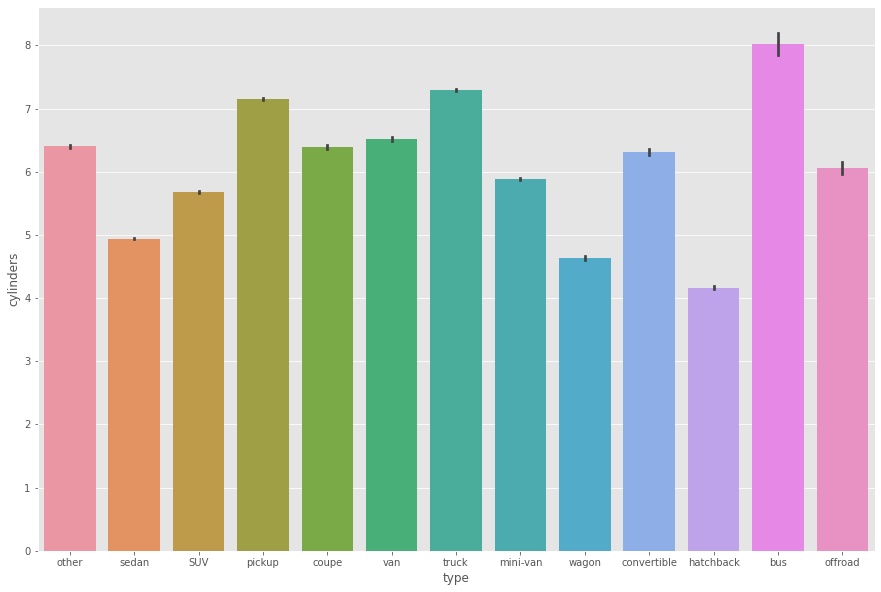

In [32]:
import seaborn as sns
fig = plt.subplots(figsize = (15,10))
sns.barplot(df_vehicles.type, df_vehicles.cylinders)

In [33]:
df_vehicles.cylinders.fillna(6, inplace=True)

In [34]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     345475 non-null  float64
 8   fuel          345475 non-null  object 
 9   odometer      345475 non-null  float64
 10  transmission  345475 non-null  object 
 11  drive         285900 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 47.6+ MB


<b>Атрибут "drive"</b> содержит данные о типе привода. Около 60 000 пустых строк, которые вполне реально восстановить, основываясь на статистике. Построим график зависимости типа привода от двигателя

In [35]:
df_vehicles_copy = df_vehicles.copy()

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive', ylabel='cylinders'>

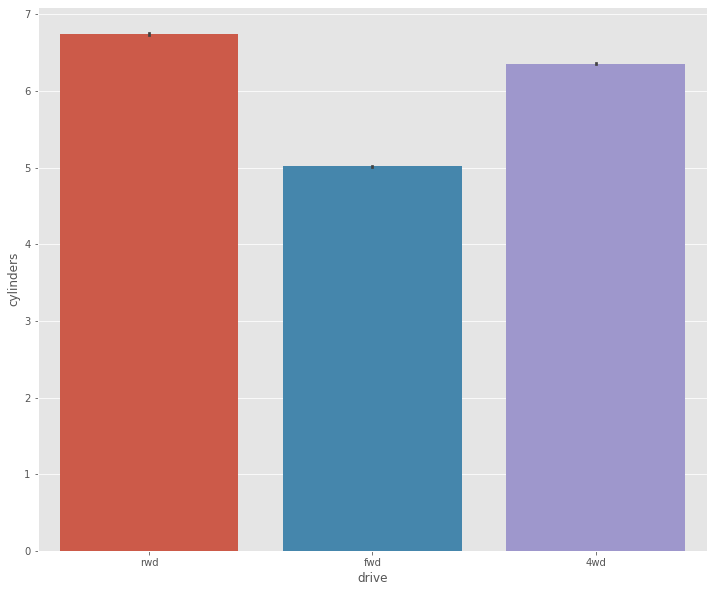

In [36]:
import seaborn as sns
fig = plt.subplots(figsize = (12,10))
sns.barplot( df_vehicles_copy.drive, df_vehicles_copy.cylinders)

Как видно из гистограммы, вполне реально построить зависимость типа привода от типа двигателя. Конечно, в реальной жизни на тип привода будет влиять так же тип трансмиссии, тип кузова, а так же производитель. Но, в качестве учебного проекта, подобной зависимости должно быть достаточно. Восстановим данные

#### Задний привод

In [37]:
df_vehicles_copy = df_vehicles_copy.replace(np.nan, 'unknown')

In [38]:
df_vehicles_rwd_copy = df_vehicles_copy.loc[df_vehicles_copy['drive'] == 'rwd']
df_vehicles_rwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8.0,gas,32742.0,other,rwd,other,unknown
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,2000,1974.0,chevrolet,c-10,good,4.0,gas,190000.0,automatic,rwd,pickup,blue
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8.0,gas,9692.0,other,rwd,coupe,blue
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8.0,gas,2778.0,other,rwd,coupe,red
11,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,36990,2013.0,bmw,m3 coupe 2d,good,8.0,gas,50956.0,other,rwd,coupe,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458184,https://milwaukee.craigslist.org/cto/d/oconomo...,milwaukee,5900,2010.0,chevrolet,cargo van,good,6.0,gas,1.0,automatic,rwd,van,white
458199,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,39990,2019.0,dodge,challenger r/t scat pack,good,8.0,gas,4191.0,other,rwd,coupe,black
458200,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,13990,2014.0,bmw,i3 hatchback 4d,good,6.0,electric,28446.0,other,rwd,hatchback,silver
458201,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,14590,2015.0,bmw,i3 hatchback 4d,good,6.0,electric,16347.0,other,rwd,hatchback,unknown


In [39]:
df_vehicles_rwd_copy.cylinders.value_counts()

8.0     24613
6.0     24325
4.0      4872
10.0      527
2.0       180
5.0       163
3.0       100
12.0       77
Name: cylinders, dtype: int64

Обратим внимание, что для заднего привода наиболее часто встречающееся число цилиндро: 6 и 8. Из гистограммы мы знаем, что среднее значение стремится к 7, следовательно, так как 7-ми цилиндровых двигателей не бывает, то вполне реально предположить, что автомобили оснащенные 8-ми цилиндровым двигателем имеют задний привод

In [40]:
df_vehicles_rwd_copy = df_vehicles_copy.loc[df_vehicles_copy['drive'] == 'unknown']
df_vehicles_rwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,unknown,SUV,blue
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6.0,gas,33290.0,other,unknown,pickup,red
9,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4.0,gas,4775.0,automatic,unknown,van,unknown
12,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,6.0,other,57926.0,other,unknown,pickup,unknown
18,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,32990,2019.0,ford,f150 supercrew cab xlt,good,6.0,gas,6910.0,other,unknown,pickup,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458134,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,29990,2018.0,nissan,titan crew cab sv pickup,good,8.0,gas,11901.0,other,unknown,pickup,black
458145,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,5500,2010.0,ford,focus,good,6.0,gas,94293.0,automatic,unknown,sedan,red
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,32,32' 2 car trailer,good,6.0,other,100.0,other,unknown,other,black
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,,3200,excellent,6.0,diesel,30526.0,automatic,unknown,bus,white


In [41]:
df_vehicles_rwd_copy = df_vehicles_rwd_copy.loc[df_vehicles_rwd_copy['cylinders'] == 8]
df_vehicles_rwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
45,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33990,2016.0,ford,f150 supercrew cab xlt,good,8.0,gas,18175.0,automatic,unknown,pickup,red
66,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,25990,2019.0,ford,f150 regular cab xl pickup,good,8.0,gas,5439.0,other,unknown,pickup,white
81,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29990,2014.0,chevrolet,silverado 1500 crew,good,8.0,gas,46322.0,automatic,unknown,pickup,black
94,https://bham.craigslist.org/ctd/d/summerville-...,birmingham,8350,2008.0,chevrolet,silverado 2500hd,good,8.0,gas,239485.0,automatic,unknown,truck,white
118,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,39590,2017.0,toyota,tundra crewmax limited,good,8.0,gas,19725.0,automatic,unknown,pickup,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457854,https://spokane.craigslist.org/cto/d/kennewick...,spokane / coeur d'alene,22500,2011.0,lexus,ls 460,excellent,8.0,gas,58000.0,automatic,unknown,sedan,unknown
457859,https://spokane.craigslist.org/ctd/d/otis-orch...,spokane / coeur d'alene,36995,2015.0,gmc,yukon slt,excellent,8.0,gas,77670.0,automatic,unknown,SUV,unknown
457891,https://morgantown.craigslist.org/ctd/d/morgan...,morgantown,19990,2010.0,chevrolet,silverado 1500 regular,good,8.0,other,24668.0,other,unknown,pickup,blue
458126,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,31990,2019.0,nissan,titan crew cab sv pickup,good,8.0,other,6657.0,other,unknown,pickup,red


In [42]:
df_vehicles_rwd_copy = df_vehicles_rwd_copy.replace('unknown',np.nan)
df_vehicles_rwd_copy.drive.fillna('rwd', inplace=True)
df_vehicles_rwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
45,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33990,2016.0,ford,f150 supercrew cab xlt,good,8.0,gas,18175.0,automatic,rwd,pickup,red
66,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,25990,2019.0,ford,f150 regular cab xl pickup,good,8.0,gas,5439.0,other,rwd,pickup,white
81,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29990,2014.0,chevrolet,silverado 1500 crew,good,8.0,gas,46322.0,automatic,rwd,pickup,black
94,https://bham.craigslist.org/ctd/d/summerville-...,birmingham,8350,2008.0,chevrolet,silverado 2500hd,good,8.0,gas,239485.0,automatic,rwd,truck,white
118,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,39590,2017.0,toyota,tundra crewmax limited,good,8.0,gas,19725.0,automatic,rwd,pickup,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457854,https://spokane.craigslist.org/cto/d/kennewick...,spokane / coeur d'alene,22500,2011.0,lexus,ls 460,excellent,8.0,gas,58000.0,automatic,rwd,sedan,NaN
457859,https://spokane.craigslist.org/ctd/d/otis-orch...,spokane / coeur d'alene,36995,2015.0,gmc,yukon slt,excellent,8.0,gas,77670.0,automatic,rwd,SUV,NaN
457891,https://morgantown.craigslist.org/ctd/d/morgan...,morgantown,19990,2010.0,chevrolet,silverado 1500 regular,good,8.0,other,24668.0,other,rwd,pickup,blue
458126,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,31990,2019.0,nissan,titan crew cab sv pickup,good,8.0,other,6657.0,other,rwd,pickup,red


In [43]:
df_vehicles.drive.fillna(df_vehicles_rwd_copy.drive, inplace=True)
df_vehicles

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8.0,gas,32742.0,other,rwd,other,NaN
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,7500,2014.0,hyundai,sonata,excellent,4.0,gas,93600.0,automatic,fwd,sedan,NaN
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,NaN,SUV,blue
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,2000,1974.0,chevrolet,c-10,good,4.0,gas,190000.0,automatic,rwd,pickup,blue
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,19500,2005.0,ford,f350 lariat,excellent,8.0,diesel,116000.0,automatic,4wd,pickup,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,https://wausau.craigslist.org/cto/d/wittenberg...,wausau,5300,2013.0,chevrolet,captiva,excellent,4.0,gas,140000.0,automatic,fwd,SUV,blue
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,14995,2014.0,cadillac,srx,excellent,6.0,gas,83790.0,automatic,4wd,SUV,silver
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,17895,2018.0,hyundai,tucson,excellent,4.0,gas,31888.0,automatic,4wd,SUV,white
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6.0,gas,53000.0,automatic,4wd,coupe,black


#### Передний привод

In [44]:
df_vehicles_fwd_copy = df_vehicles_copy.loc[df_vehicles_copy['drive'] == 'fwd']
df_vehicles_fwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,7500,2014.0,hyundai,sonata,excellent,4.0,gas,93600.0,automatic,fwd,sedan,unknown
21,https://auburn.craigslist.org/cto/d/alexander-...,auburn,6500,2010.0,bmw328x,bmw328xi,excellent,6.0,gas,149786.0,automatic,fwd,sedan,black
31,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,7998,2013.0,dodge,grand caravan,excellent,6.0,gas,94325.0,automatic,fwd,mini-van,grey
32,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,8998,2009.0,ford,flex,excellent,6.0,gas,148452.0,automatic,fwd,wagon,blue
34,https://auburn.craigslist.org/ctd/d/sacramento...,auburn,10998,2013.0,dodge,journey,excellent,6.0,gas,43423.0,automatic,fwd,SUV,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458188,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,8500,2010.0,mini,cooper s clubman,excellent,4.0,gas,72600.0,manual,fwd,wagon,white
458189,https://milwaukee.craigslist.org/ctd/d/muskego...,milwaukee,4995,2009.0,chevrolet,cobalt ls,good,4.0,gas,148646.0,manual,fwd,coupe,green
458202,https://wausau.craigslist.org/ctd/d/auburndale...,wausau,4995,2005.0,buick,rendezvous cx,good,6.0,gas,137962.0,automatic,fwd,SUV,grey
458204,https://wausau.craigslist.org/ctd/d/auburndale...,wausau,4495,2006.0,buick,lacrosse cx,good,6.0,gas,121488.0,automatic,fwd,sedan,black


In [45]:
df_vehicles_fwd_copy.cylinders.value_counts()

4.0     53888
6.0     52421
8.0      1484
5.0      1047
3.0       332
2.0       274
10.0       28
12.0        8
Name: cylinders, dtype: int64

Обратим внимание, что для переднего привода наиболее часто встречающееся число цилиндров: 4 и 6. Из гистограммы мы знаем, что среднее значение стремится к 5, вполне реально предположить, что автомобили оснащенные 4-х и 6-ти цилиндровыми двигателями имеют задний привод. Выбрав ту или иную характеристику мы ошибемся с наименьшей вероятностью.

In [46]:
df_vehicles_fwd_copy = df_vehicles_copy.loc[df_vehicles_copy['drive'] == 'unknown']
df_vehicles_fwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,unknown,SUV,blue
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6.0,gas,33290.0,other,unknown,pickup,red
9,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4.0,gas,4775.0,automatic,unknown,van,unknown
12,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,6.0,other,57926.0,other,unknown,pickup,unknown
18,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,32990,2019.0,ford,f150 supercrew cab xlt,good,6.0,gas,6910.0,other,unknown,pickup,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458134,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,29990,2018.0,nissan,titan crew cab sv pickup,good,8.0,gas,11901.0,other,unknown,pickup,black
458145,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,5500,2010.0,ford,focus,good,6.0,gas,94293.0,automatic,unknown,sedan,red
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,32,32' 2 car trailer,good,6.0,other,100.0,other,unknown,other,black
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,,3200,excellent,6.0,diesel,30526.0,automatic,unknown,bus,white


In [47]:
df_vehicles_fwd_copy = df_vehicles_fwd_copy.loc[df_vehicles_fwd_copy['cylinders'] == 4]
df_vehicles_fwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
9,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4.0,gas,4775.0,automatic,unknown,van,unknown
38,https://auburn.craigslist.org/ctd/d/san-rafael...,auburn,29988,2019.0,lexus,nx 300 f sport,excellent,4.0,gas,18022.0,automatic,unknown,SUV,unknown
39,https://auburn.craigslist.org/ctd/d/san-rafael...,auburn,15988,2016.0,honda,civic lx,excellent,4.0,gas,35860.0,automatic,unknown,sedan,unknown
40,https://auburn.craigslist.org/ctd/d/san-rafael...,auburn,20488,2014.0,mercedes-benz,cla 250,excellent,4.0,gas,46313.0,automatic,unknown,sedan,unknown
191,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,18990,2014.0,bmw,3 series,excellent,4.0,gas,53352.0,automatic,unknown,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457765,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,21940,2017.0,mazda,cx-5,excellent,4.0,gas,43672.0,automatic,unknown,SUV,blue
457783,https://seattle.craigslist.org/tac/ctd/d/lynnw...,seattle-tacoma,14988,2017.0,toyota,prius twohatchback,excellent,4.0,hybrid,115061.0,automatic,unknown,other,unknown
457821,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,8991,2012.0,nissan,sentra,good,4.0,gas,97321.0,manual,unknown,sedan,unknown
457839,https://skagit.craigslist.org/ctd/d/bellingham...,skagit / island / SJI,16999,2015.0,bmw,3 series,good,4.0,gas,81040.0,automatic,unknown,hatchback,unknown


In [48]:
df_vehicles_fwd_copy = df_vehicles_fwd_copy.replace('unknown',np.nan)
df_vehicles_fwd_copy.drive.fillna('fwd', inplace=True)
df_vehicles_fwd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
9,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4.0,gas,4775.0,automatic,fwd,van,NaN
38,https://auburn.craigslist.org/ctd/d/san-rafael...,auburn,29988,2019.0,lexus,nx 300 f sport,excellent,4.0,gas,18022.0,automatic,fwd,SUV,NaN
39,https://auburn.craigslist.org/ctd/d/san-rafael...,auburn,15988,2016.0,honda,civic lx,excellent,4.0,gas,35860.0,automatic,fwd,sedan,NaN
40,https://auburn.craigslist.org/ctd/d/san-rafael...,auburn,20488,2014.0,mercedes-benz,cla 250,excellent,4.0,gas,46313.0,automatic,fwd,sedan,NaN
191,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,18990,2014.0,bmw,3 series,excellent,4.0,gas,53352.0,automatic,fwd,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457765,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,21940,2017.0,mazda,cx-5,excellent,4.0,gas,43672.0,automatic,fwd,SUV,blue
457783,https://seattle.craigslist.org/tac/ctd/d/lynnw...,seattle-tacoma,14988,2017.0,toyota,prius twohatchback,excellent,4.0,hybrid,115061.0,automatic,fwd,other,NaN
457821,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,8991,2012.0,nissan,sentra,good,4.0,gas,97321.0,manual,fwd,sedan,NaN
457839,https://skagit.craigslist.org/ctd/d/bellingham...,skagit / island / SJI,16999,2015.0,bmw,3 series,good,4.0,gas,81040.0,automatic,fwd,hatchback,NaN


In [49]:
df_vehicles.drive.fillna(df_vehicles_rwd_copy.drive, inplace=True)
df_vehicles

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8.0,gas,32742.0,other,rwd,other,NaN
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,7500,2014.0,hyundai,sonata,excellent,4.0,gas,93600.0,automatic,fwd,sedan,NaN
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,NaN,SUV,blue
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,2000,1974.0,chevrolet,c-10,good,4.0,gas,190000.0,automatic,rwd,pickup,blue
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,19500,2005.0,ford,f350 lariat,excellent,8.0,diesel,116000.0,automatic,4wd,pickup,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,https://wausau.craigslist.org/cto/d/wittenberg...,wausau,5300,2013.0,chevrolet,captiva,excellent,4.0,gas,140000.0,automatic,fwd,SUV,blue
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,14995,2014.0,cadillac,srx,excellent,6.0,gas,83790.0,automatic,4wd,SUV,silver
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,17895,2018.0,hyundai,tucson,excellent,4.0,gas,31888.0,automatic,4wd,SUV,white
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6.0,gas,53000.0,automatic,4wd,coupe,black


#### Полный привод

In [50]:
df_vehicles_4wd_copy = df_vehicles_copy.loc[df_vehicles_copy['drive'] == '4wd']
df_vehicles_4wd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,19500,2005.0,ford,f350 lariat,excellent,8.0,diesel,116000.0,automatic,4wd,pickup,blue
8,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,31990,2017.0,jeep,wrangler unlimited sport s,good,6.0,gas,29614.0,other,4wd,other,unknown
10,https://auburn.craigslist.org/cto/d/opelika-20...,auburn,27500,2012.0,ford,f-250,excellent,6.0,diesel,189000.0,automatic,4wd,pickup,silver
17,https://auburn.craigslist.org/cto/d/waverly-to...,auburn,2650,1996.0,toyota,t100 4x4,good,6.0,gas,414625.0,automatic,4wd,pickup,blue
19,https://auburn.craigslist.org/cto/d/auburn-202...,auburn,47000,2020.0,jeep,gladiator,good,6.0,gas,10500.0,automatic,4wd,pickup,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458196,https://sheboygan.craigslist.org/cto/d/oostbur...,sheboygan,2700,2004.0,ford,explorer,good,6.0,gas,237000.0,automatic,4wd,SUV,green
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,14995,2014.0,cadillac,srx,excellent,6.0,gas,83790.0,automatic,4wd,SUV,silver
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,17895,2018.0,hyundai,tucson,excellent,4.0,gas,31888.0,automatic,4wd,SUV,white
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6.0,gas,53000.0,automatic,4wd,coupe,black


In [51]:
df_vehicles_4wd_copy.cylinders.value_counts()

6.0     63596
8.0     38688
4.0     17883
10.0      684
5.0       435
2.0       177
12.0       60
3.0        38
Name: cylinders, dtype: int64

Обратим внимание, что для полного привода характерное число цилиндров: 6 и 8. Из гистограммы мы знаем, что среднее значение стремится к 6,а так как 7-ми цилиндровых двигателей не бывает, и для заднего привода мы приняли раным 8-ми цилиндровые двигатели, то вполне реально предположить, что автомобили оснащенные 6-ти цилиндровым двигателем имеют полный привод. 

In [52]:
df_vehicles_4wd_copy = df_vehicles_copy.loc[df_vehicles_copy['drive'] == 'unknown']
df_vehicles_4wd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,unknown,SUV,blue
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6.0,gas,33290.0,other,unknown,pickup,red
9,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4.0,gas,4775.0,automatic,unknown,van,unknown
12,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,6.0,other,57926.0,other,unknown,pickup,unknown
18,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,32990,2019.0,ford,f150 supercrew cab xlt,good,6.0,gas,6910.0,other,unknown,pickup,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458134,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,29990,2018.0,nissan,titan crew cab sv pickup,good,8.0,gas,11901.0,other,unknown,pickup,black
458145,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,5500,2010.0,ford,focus,good,6.0,gas,94293.0,automatic,unknown,sedan,red
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,32,32' 2 car trailer,good,6.0,other,100.0,other,unknown,other,black
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,,3200,excellent,6.0,diesel,30526.0,automatic,unknown,bus,white


In [53]:
df_vehicles_4wd_copy = df_vehicles_4wd_copy.loc[df_vehicles_4wd_copy['cylinders'] == 6]
df_vehicles_4wd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,unknown,SUV,blue
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6.0,gas,33290.0,other,unknown,pickup,red
12,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,6.0,other,57926.0,other,unknown,pickup,unknown
18,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,32990,2019.0,ford,f150 supercrew cab xlt,good,6.0,gas,6910.0,other,unknown,pickup,silver
22,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,28990,2018.0,toyota,tacoma double cab sr5,good,6.0,gas,17117.0,other,unknown,pickup,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458133,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,25990,2017.0,ford,expedition el xlt sport,good,6.0,gas,72370.0,automatic,unknown,other,black
458145,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,5500,2010.0,ford,focus,good,6.0,gas,94293.0,automatic,unknown,sedan,red
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,32,32' 2 car trailer,good,6.0,other,100.0,other,unknown,other,black
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,,3200,excellent,6.0,diesel,30526.0,automatic,unknown,bus,white


In [54]:
df_vehicles_4wd_copy = df_vehicles_4wd_copy.replace('unknown',np.nan)
df_vehicles_4wd_copy.drive.fillna('4wd', inplace=True)
df_vehicles_4wd_copy

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,4wd,SUV,blue
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6.0,gas,33290.0,other,4wd,pickup,red
12,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,6.0,other,57926.0,other,4wd,pickup,NaN
18,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,32990,2019.0,ford,f150 supercrew cab xlt,good,6.0,gas,6910.0,other,4wd,pickup,silver
22,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,28990,2018.0,toyota,tacoma double cab sr5,good,6.0,gas,17117.0,other,4wd,pickup,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458133,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,25990,2017.0,ford,expedition el xlt sport,good,6.0,gas,72370.0,automatic,4wd,other,black
458145,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,5500,2010.0,ford,focus,good,6.0,gas,94293.0,automatic,4wd,sedan,red
458148,https://milwaukee.craigslist.org/cto/d/hartlan...,milwaukee,3500,2001.0,32,32' 2 car trailer,good,6.0,other,100.0,other,4wd,other,black
458162,https://milwaukee.craigslist.org/cto/d/lannon-...,milwaukee,46000,2009.0,,3200,excellent,6.0,diesel,30526.0,automatic,4wd,bus,white


In [55]:
df_vehicles.drive.fillna(df_vehicles_4wd_copy.drive, inplace=True)
df_vehicles

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8.0,gas,32742.0,other,rwd,other,NaN
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,7500,2014.0,hyundai,sonata,excellent,4.0,gas,93600.0,automatic,fwd,sedan,NaN
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,4wd,SUV,blue
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,2000,1974.0,chevrolet,c-10,good,4.0,gas,190000.0,automatic,rwd,pickup,blue
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,19500,2005.0,ford,f350 lariat,excellent,8.0,diesel,116000.0,automatic,4wd,pickup,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,https://wausau.craigslist.org/cto/d/wittenberg...,wausau,5300,2013.0,chevrolet,captiva,excellent,4.0,gas,140000.0,automatic,fwd,SUV,blue
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,14995,2014.0,cadillac,srx,excellent,6.0,gas,83790.0,automatic,4wd,SUV,silver
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,17895,2018.0,hyundai,tucson,excellent,4.0,gas,31888.0,automatic,4wd,SUV,white
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6.0,gas,53000.0,automatic,4wd,coupe,black


In [56]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     345475 non-null  float64
 8   fuel          345475 non-null  object 
 9   odometer      345475 non-null  float64
 10  transmission  345475 non-null  object 
 11  drive         337596 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 47.6+ MB


In [57]:
df_vehicles.drive.value_counts()

4wd    166990
fwd    109482
rwd     61124
Name: drive, dtype: int64

Оставшиеся 7000 значений заменим на наиболее часто встречающееся

In [58]:
df_vehicles.drive.fillna('4wd', inplace=True)
df_vehicles

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8.0,gas,32742.0,other,rwd,other,NaN
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,7500,2014.0,hyundai,sonata,excellent,4.0,gas,93600.0,automatic,fwd,sedan,NaN
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,4900,2006.0,bmw,x3 3.0i,good,6.0,gas,87046.0,automatic,4wd,SUV,blue
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,2000,1974.0,chevrolet,c-10,good,4.0,gas,190000.0,automatic,rwd,pickup,blue
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,19500,2005.0,ford,f350 lariat,excellent,8.0,diesel,116000.0,automatic,4wd,pickup,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,https://wausau.craigslist.org/cto/d/wittenberg...,wausau,5300,2013.0,chevrolet,captiva,excellent,4.0,gas,140000.0,automatic,fwd,SUV,blue
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,14995,2014.0,cadillac,srx,excellent,6.0,gas,83790.0,automatic,4wd,SUV,silver
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,17895,2018.0,hyundai,tucson,excellent,4.0,gas,31888.0,automatic,4wd,SUV,white
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6.0,gas,53000.0,automatic,4wd,coupe,black


In [59]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           345475 non-null  object 
 1   region        345475 non-null  object 
 2   price         345475 non-null  int64  
 3   year          345475 non-null  object 
 4   manufacturer  345475 non-null  object 
 5   model         343183 non-null  object 
 6   condition     345475 non-null  object 
 7   cylinders     345475 non-null  float64
 8   fuel          345475 non-null  object 
 9   odometer      345475 non-null  float64
 10  transmission  345475 non-null  object 
 11  drive         345475 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   286962 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 47.6+ MB


<b>Предпоследний Атрибут "paint_color"</b> содержит данные о цвете кузова. Около 60 000 пустых строк, которые почти нереально восстановить. Как результат, данный столбец подлежит удалению

In [60]:
df_vehicles = df_vehicles.drop(['url', 'paint_color'], axis=1)
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345475 entries, 0 to 458211
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        345475 non-null  object 
 1   price         345475 non-null  int64  
 2   year          345475 non-null  object 
 3   manufacturer  345475 non-null  object 
 4   model         343183 non-null  object 
 5   condition     345475 non-null  object 
 6   cylinders     345475 non-null  float64
 7   fuel          345475 non-null  object 
 8   odometer      345475 non-null  float64
 9   transmission  345475 non-null  object 
 10  drive         345475 non-null  object 
 11  type          345475 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 42.3+ MB


<b>Предпоследний Атрибут "model"</b> содержит данные о модели автомобиля. Около 2 000 пустых строк, которые почти нереально восстановить. Решено удалить отсутствующие строки

In [61]:
df_vehicles = df_vehicles.dropna(subset=['model'],how = 'any', axis = 0)

## Кодирование данных

Первым этапом необходимо дополнительно обработать даты. Некоторые данные нестабильны

In [62]:
df_vehicles.year.unique()

array([2010.0, 2014.0, 2006.0, 1974.0, 2005.0, 2016.0, 2012.0, 2017.0,
       2019.0, 2013.0, 2003.0, '2019', 1996.0, 2020.0, 2018.0, 2009.0,
       2015.0, 2004.0, 2011.0, 2008.0, 2007.0, 1990.0, 1997.0, 2000.0,
       1976.0, 1992.0, 1968.0, 1991.0, 2002.0, 1956.0, 2001.0, 1998.0,
       '2018', 1988.0, 1993.0, 1999.0, 1971.0, 1957.0, 1964.0, '2020',
       1966.0, 1982.0, 1962.0, 1941.0, 1930.0, 1946.0, 1967.0, 1995.0,
       1955.0, 1911.0, 1978.0, 1989.0, 1973.0, 1963.0, 1987.0, 1969.0,
       1954.0, 1994.0, 1965.0, 1985.0, 1972.0, 1979.0, 1953.0, 1986.0,
       1912.0, 1926.0, 1940.0, 1984.0, 1980.0, 1970.0, 1975.0, 1983.0,
       2021.0, 1961.0, 1937.0, 1931.0, 1951.0, 1948.0, 1928.0, 1949.0,
       1950.0, 1960.0, 1952.0, 1981.0, 1977.0, 1939.0, 1936.0, 1958.0,
       1947.0, 1923.0, 1932.0, 1959.0, 1929.0, 1933.0, 1927.0, 1922.0,
       1938.0, 1934.0, 1925.0, 1913.0, '4', 1900.0, 1918.0, 1924.0,
       1914.0, '7240264463', 1935.0, 1915.0, 1942.0, '2021', 1910.0,
       1945

In [63]:
df_vehicles = df_vehicles.replace('7240264463', 2017)
df_vehicles = df_vehicles.replace('4', 2017)
df_vehicles = df_vehicles.replace('2018', 2018)
df_vehicles = df_vehicles.replace('2019', 2019)
df_vehicles = df_vehicles.replace('2020', 2020)
df_vehicles = df_vehicles.replace('2021', 2021)

In [64]:
df_vehicles.year.unique()

array([2010., 2014., 2006., 1974., 2005., 2016., 2012., 2017., 2019.,
       2013., 2003., 1996., 2020., 2018., 2009., 2015., 2004., 2011.,
       2008., 2007., 1990., 1997., 2000., 1976., 1992., 1968., 1991.,
       2002., 1956., 2001., 1998., 1988., 1993., 1999., 1971., 1957.,
       1964., 1966., 1982., 1962., 1941., 1930., 1946., 1967., 1995.,
       1955., 1911., 1978., 1989., 1973., 1963., 1987., 1969., 1954.,
       1994., 1965., 1985., 1972., 1979., 1953., 1986., 1912., 1926.,
       1940., 1984., 1980., 1970., 1975., 1983., 2021., 1961., 1937.,
       1931., 1951., 1948., 1928., 1949., 1950., 1960., 1952., 1981.,
       1977., 1939., 1936., 1958., 1947., 1923., 1932., 1959., 1929.,
       1933., 1927., 1922., 1938., 1934., 1925., 1913., 1900., 1918.,
       1924., 1914., 1935., 1915., 1942., 1910., 1945., 1921.])

Далее для атрибута, означающего состояние ТС, применяем ранговую систему кодирования, где:

excellent (превосходное состояние) - 3 балла
good (хорошее состояние) - 2 балла
fair (удовлетворительное состояние) - 1 балл
salvage (состояние "на запчасти") - 0 баллов

In [65]:
df_vehicles.condition.unique()

array(['good', 'excellent', 'fair', 'salvage'], dtype=object)

In [66]:
df_vehicles['condition'] = df_vehicles['condition'].map({'excellent': 3,'good': 2, 'fair': 1, 'salvage': 0 })
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
0,auburn,35990,2010.0,chevrolet,corvette grand sport,2,8.0,gas,32742.0,other,rwd,other
1,auburn,7500,2014.0,hyundai,sonata,3,4.0,gas,93600.0,automatic,fwd,sedan
2,auburn,4900,2006.0,bmw,x3 3.0i,2,6.0,gas,87046.0,automatic,4wd,SUV
3,auburn,2000,1974.0,chevrolet,c-10,2,4.0,gas,190000.0,automatic,rwd,pickup
4,auburn,19500,2005.0,ford,f350 lariat,3,8.0,diesel,116000.0,automatic,4wd,pickup
...,...,...,...,...,...,...,...,...,...,...,...,...
458206,wausau,5300,2013.0,chevrolet,captiva,3,4.0,gas,140000.0,automatic,fwd,SUV
458208,wausau,14995,2014.0,cadillac,srx,3,6.0,gas,83790.0,automatic,4wd,SUV
458209,wausau,17895,2018.0,hyundai,tucson,3,4.0,gas,31888.0,automatic,4wd,SUV
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,3,6.0,gas,53000.0,automatic,4wd,coupe


In [67]:
df_vehicles.condition.unique()

array([2, 3, 1, 0])

In [68]:
df_vehicles.nunique(axis = 0)

region            404
price           15006
year              107
manufacturer     1599
model           25758
condition           4
cylinders           8
fuel                5
odometer        95482
transmission        3
drive               3
type               13
dtype: int64

In [69]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343183 entries, 0 to 458211
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        343183 non-null  object 
 1   price         343183 non-null  int64  
 2   year          343183 non-null  float64
 3   manufacturer  343183 non-null  object 
 4   model         343183 non-null  object 
 5   condition     343183 non-null  int64  
 6   cylinders     343183 non-null  float64
 7   fuel          343183 non-null  object 
 8   odometer      343183 non-null  float64
 9   transmission  343183 non-null  object 
 10  drive         343183 non-null  object 
 11  type          343183 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.0+ MB


Для атрибутов, обозначающих тип топлива, тип КПП, тип привода и тип кузова, применим метод One Hot Encoding. Данный тип кодирования наиболее приемлем для такого типа данных (category data) 

In [70]:
df_vehicles = pd.get_dummies(df_vehicles, columns=["fuel"])
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,auburn,35990,2010.0,chevrolet,corvette grand sport,2,8.0,32742.0,other,rwd,other,0,0,1,0,0
1,auburn,7500,2014.0,hyundai,sonata,3,4.0,93600.0,automatic,fwd,sedan,0,0,1,0,0
2,auburn,4900,2006.0,bmw,x3 3.0i,2,6.0,87046.0,automatic,4wd,SUV,0,0,1,0,0
3,auburn,2000,1974.0,chevrolet,c-10,2,4.0,190000.0,automatic,rwd,pickup,0,0,1,0,0
4,auburn,19500,2005.0,ford,f350 lariat,3,8.0,116000.0,automatic,4wd,pickup,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,wausau,5300,2013.0,chevrolet,captiva,3,4.0,140000.0,automatic,fwd,SUV,0,0,1,0,0
458208,wausau,14995,2014.0,cadillac,srx,3,6.0,83790.0,automatic,4wd,SUV,0,0,1,0,0
458209,wausau,17895,2018.0,hyundai,tucson,3,4.0,31888.0,automatic,4wd,SUV,0,0,1,0,0
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,3,6.0,53000.0,automatic,4wd,coupe,0,0,1,0,0


In [71]:
df_vehicles = pd.get_dummies(df_vehicles, columns=["transmission"])
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,odometer,drive,type,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other
0,auburn,35990,2010.0,chevrolet,corvette grand sport,2,8.0,32742.0,rwd,other,0,0,1,0,0,0,0,1
1,auburn,7500,2014.0,hyundai,sonata,3,4.0,93600.0,fwd,sedan,0,0,1,0,0,1,0,0
2,auburn,4900,2006.0,bmw,x3 3.0i,2,6.0,87046.0,4wd,SUV,0,0,1,0,0,1,0,0
3,auburn,2000,1974.0,chevrolet,c-10,2,4.0,190000.0,rwd,pickup,0,0,1,0,0,1,0,0
4,auburn,19500,2005.0,ford,f350 lariat,3,8.0,116000.0,4wd,pickup,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,wausau,5300,2013.0,chevrolet,captiva,3,4.0,140000.0,fwd,SUV,0,0,1,0,0,1,0,0
458208,wausau,14995,2014.0,cadillac,srx,3,6.0,83790.0,4wd,SUV,0,0,1,0,0,1,0,0
458209,wausau,17895,2018.0,hyundai,tucson,3,4.0,31888.0,4wd,SUV,0,0,1,0,0,1,0,0
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,3,6.0,53000.0,4wd,coupe,0,0,1,0,0,1,0,0


In [72]:
df_vehicles = pd.get_dummies(df_vehicles, columns=["drive"])
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,odometer,type,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd
0,auburn,35990,2010.0,chevrolet,corvette grand sport,2,8.0,32742.0,other,0,0,1,0,0,0,0,1,0,0,1
1,auburn,7500,2014.0,hyundai,sonata,3,4.0,93600.0,sedan,0,0,1,0,0,1,0,0,0,1,0
2,auburn,4900,2006.0,bmw,x3 3.0i,2,6.0,87046.0,SUV,0,0,1,0,0,1,0,0,1,0,0
3,auburn,2000,1974.0,chevrolet,c-10,2,4.0,190000.0,pickup,0,0,1,0,0,1,0,0,0,0,1
4,auburn,19500,2005.0,ford,f350 lariat,3,8.0,116000.0,pickup,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,wausau,5300,2013.0,chevrolet,captiva,3,4.0,140000.0,SUV,0,0,1,0,0,1,0,0,0,1,0
458208,wausau,14995,2014.0,cadillac,srx,3,6.0,83790.0,SUV,0,0,1,0,0,1,0,0,1,0,0
458209,wausau,17895,2018.0,hyundai,tucson,3,4.0,31888.0,SUV,0,0,1,0,0,1,0,0,1,0,0
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,3,6.0,53000.0,coupe,0,0,1,0,0,1,0,0,1,0,0


In [73]:
df_vehicles = pd.get_dummies(df_vehicles, columns=["type"])
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,odometer,fuel_diesel,fuel_electric,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,auburn,35990,2010.0,chevrolet,corvette grand sport,2,8.0,32742.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,auburn,7500,2014.0,hyundai,sonata,3,4.0,93600.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,auburn,4900,2006.0,bmw,x3 3.0i,2,6.0,87046.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,auburn,2000,1974.0,chevrolet,c-10,2,4.0,190000.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,auburn,19500,2005.0,ford,f350 lariat,3,8.0,116000.0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,wausau,5300,2013.0,chevrolet,captiva,3,4.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
458208,wausau,14995,2014.0,cadillac,srx,3,6.0,83790.0,0,0,...,0,0,0,0,0,0,0,0,0,0
458209,wausau,17895,2018.0,hyundai,tucson,3,4.0,31888.0,0,0,...,0,0,0,0,0,0,0,0,0,0
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,3,6.0,53000.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [74]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343183 entries, 0 to 458211
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   region                  343183 non-null  object 
 1   price                   343183 non-null  int64  
 2   year                    343183 non-null  float64
 3   manufacturer            343183 non-null  object 
 4   model                   343183 non-null  object 
 5   condition               343183 non-null  int64  
 6   cylinders               343183 non-null  float64
 7   odometer                343183 non-null  float64
 8   fuel_diesel             343183 non-null  uint8  
 9   fuel_electric           343183 non-null  uint8  
 10  fuel_gas                343183 non-null  uint8  
 11  fuel_hybrid             343183 non-null  uint8  
 12  fuel_other              343183 non-null  uint8  
 13  transmission_automatic  343183 non-null  uint8  
 14  transmission_manual 

Следующий атрибут region, отвечающий за регион выставления объявления, имеет около 400 уникальных значений. Кодирование такого типа данных с помощью метода One Hot Encoding не является целесообразным. Следовательно необходимо применить другой способ.  

В данном случае, используя библиотеку sklearn, проведем кодирование с помощью метода OrdinalEncoder. Данный метод преобразует категории в цифровые значения

In [75]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [76]:
df_vehicles["region"] = ord_enc.fit_transform(df_vehicles[["region"]])

In [77]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343183 entries, 0 to 458211
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   region                  343183 non-null  float64
 1   price                   343183 non-null  int64  
 2   year                    343183 non-null  float64
 3   manufacturer            343183 non-null  object 
 4   model                   343183 non-null  object 
 5   condition               343183 non-null  int64  
 6   cylinders               343183 non-null  float64
 7   odometer                343183 non-null  float64
 8   fuel_diesel             343183 non-null  uint8  
 9   fuel_electric           343183 non-null  uint8  
 10  fuel_gas                343183 non-null  uint8  
 11  fuel_hybrid             343183 non-null  uint8  
 12  fuel_other              343183 non-null  uint8  
 13  transmission_automatic  343183 non-null  uint8  
 14  transmission_manual 

Заключительные атрибуты, такие как manufacturer и model  имеют огромное кол-во уникальных значений, котрые не целесообразно кодировать, используя ранее примененные методы. В данном случае наиболее оптимальным способом кодирования является Target Encoding/ Frequency Encoding. Данный метод преобразует категориальные переменные в цифровые значения в зависимости от частоты появления в таблице. Таким образом вполне реально схранить исходное кол-во данных, а так же задать переменным вес. Чем чаще покупают автомобили данноой марки/можели, чем выше значение частоты. От этого уже и отталкивается цена на автомобиль.

In [78]:
fq = df_vehicles.groupby('manufacturer').size()/len(df_vehicles)  
# mapping values to dataframe
df_vehicles.loc[:, "{}_freq_encode".format('manufacturer')] = df_vehicles['manufacturer'].map(fq)

In [79]:
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,odometer,fuel_diesel,fuel_electric,...,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,manufacturer_freq_encode
0,16.0,35990,2010.0,chevrolet,corvette grand sport,2,8.0,32742.0,0,0,...,0,0,0,1,0,0,0,0,0,0.137900
1,16.0,7500,2014.0,hyundai,sonata,3,4.0,93600.0,0,0,...,0,0,0,0,0,1,0,0,0,0.024570
2,16.0,4900,2006.0,bmw,x3 3.0i,2,6.0,87046.0,0,0,...,0,0,0,0,0,0,0,0,0,0.029786
3,16.0,2000,1974.0,chevrolet,c-10,2,4.0,190000.0,0,0,...,0,0,0,0,1,0,0,0,0,0.137900
4,16.0,19500,2005.0,ford,f350 lariat,3,8.0,116000.0,1,0,...,0,0,0,0,1,0,0,0,0,0.170472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,382.0,5300,2013.0,chevrolet,captiva,3,4.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.137900
458208,382.0,14995,2014.0,cadillac,srx,3,6.0,83790.0,0,0,...,0,0,0,0,0,0,0,0,0,0.015036
458209,382.0,17895,2018.0,hyundai,tucson,3,4.0,31888.0,0,0,...,0,0,0,0,0,0,0,0,0,0.024570
458210,397.0,17900,2014.0,cadillac,cts coupe awd,3,6.0,53000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.015036


In [80]:
df_vehicles.model.value_counts()

f-150                               6500
silverado 1500                      4587
1500                                3250
camry                               3029
accord                              2730
                                    ... 
pathfinder sv midnight                 1
2013Lexus RX350 Sport Utility 4D       1
g35s                                   1
Good Year Wrangler                     1
bluebird 4300                          1
Name: model, Length: 25758, dtype: int64

In [81]:
fq = df_vehicles.groupby('model').size()/len(df_vehicles)  
# mapping values to dataframe
df_vehicles.loc[:, "{}_freq_encode".format('model')] = df_vehicles['model'].map(fq)
df_vehicles

,region,price,year,manufacturer,model,condition,cylinders,odometer,fuel_diesel,fuel_electric,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,manufacturer_freq_encode,model_freq_encode
0,16.0,35990,2010.0,chevrolet,corvette grand sport,2,8.0,32742.0,0,0,...,0,0,1,0,0,0,0,0,0.137900,0.001836
1,16.0,7500,2014.0,hyundai,sonata,3,4.0,93600.0,0,0,...,0,0,0,0,1,0,0,0,0.024570,0.004409
2,16.0,4900,2006.0,bmw,x3 3.0i,2,6.0,87046.0,0,0,...,0,0,0,0,0,0,0,0,0.029786,0.000032
3,16.0,2000,1974.0,chevrolet,c-10,2,4.0,190000.0,0,0,...,0,0,0,1,0,0,0,0,0.137900,0.000038
4,16.0,19500,2005.0,ford,f350 lariat,3,8.0,116000.0,1,0,...,0,0,0,1,0,0,0,0,0.170472,0.000087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,382.0,5300,2013.0,chevrolet,captiva,3,4.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,0.137900,0.000055
458208,382.0,14995,2014.0,cadillac,srx,3,6.0,83790.0,0,0,...,0,0,0,0,0,0,0,0,0.015036,0.001399
458209,382.0,17895,2018.0,hyundai,tucson,3,4.0,31888.0,0,0,...,0,0,0,0,0,0,0,0,0.024570,0.001268
458210,397.0,17900,2014.0,cadillac,cts coupe awd,3,6.0,53000.0,0,0,...,0,0,0,0,0,0,0,0,0.015036,0.000015


In [82]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343183 entries, 0 to 458211
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   region                    343183 non-null  float64
 1   price                     343183 non-null  int64  
 2   year                      343183 non-null  float64
 3   manufacturer              343183 non-null  object 
 4   model                     343183 non-null  object 
 5   condition                 343183 non-null  int64  
 6   cylinders                 343183 non-null  float64
 7   odometer                  343183 non-null  float64
 8   fuel_diesel               343183 non-null  uint8  
 9   fuel_electric             343183 non-null  uint8  
 10  fuel_gas                  343183 non-null  uint8  
 11  fuel_hybrid               343183 non-null  uint8  
 12  fuel_other                343183 non-null  uint8  
 13  transmission_automatic    343183 non-null  u

In [83]:
df_vehicles.nunique(axis = 0)

region                        404
price                       15006
year                          107
manufacturer                 1599
model                       25758
condition                       4
cylinders                       8
odometer                    95482
fuel_diesel                     2
fuel_electric                   2
fuel_gas                        2
fuel_hybrid                     2
fuel_other                      2
transmission_automatic          2
transmission_manual             2
transmission_other              2
drive_4wd                       2
drive_fwd                       2
drive_rwd                       2
type_SUV                        2
type_bus                        2
type_convertible                2
type_coupe                      2
type_hatchback                  2
type_mini-van                   2
type_offroad                    2
type_other                      2
type_pickup                     2
type_sedan                      2
type_truck    

In [84]:
df_vehicles.describe()

,region,price,year,condition,cylinders,odometer,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,manufacturer_freq_encode,model_freq_encode
count,343183.000000,3.431830e+05,343183.000000,343183.000000,343183.000000,3.431830e+05,343183.000000,343183.000000,343183.000000,343183.000000,...,343183.000000,343183.000000,343183.000000,343183.000000,343183.000000,343183.000000,343183.000000,343183.000000,343183.000000,343183.000000
mean,193.939009,2.784680e+04,2011.485347,2.587710,5.921103,9.915955e+04,0.062445,0.005941,0.877695,0.013424,...,0.018156,0.001821,0.069814,0.124196,0.268326,0.102913,0.027764,0.030462,0.073829,0.002209
std,118.507564,6.184683e+06,7.928775,0.553541,1.387585,3.496930e+06,0.241962,0.076851,0.327638,0.115083,...,0.133517,0.042637,0.254834,0.329806,0.443089,0.303846,0.164295,0.171855,0.059563,0.003502
min,0.000000,0.000000e+00,1900.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000003
25%,82.000000,5.495000e+03,2008.000000,2.000000,5.000000,4.118300e+04,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024238,0.000102
50%,197.000000,1.200000e+04,2013.000000,3.000000,6.000000,8.837700e+04,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052651,0.000661
75%,290.000000,2.299000e+04,2016.000000,3.000000,6.000000,1.266490e+05,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.137900,0.003060
max,403.000000,3.615215e+09,2021.000000,3.000000,12.000000,2.043756e+09,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.170472,0.018940


В результате преобразования данных мы получаем датафрейм, состоящий из 31 столбец и 343 тысяч строк. Напоминаем, что исходный датасет состоял из 458 тысяч строк. Таким образом нам удалось сохранить порядка 75% данных, при этом удалив всего 2 столбца, которые действительно могут повлиять на формирование цены (цвет автомобиля, описание)

Заключительным этапом отсортитруем ценовые диапозоны

In [85]:
df_vehicles.price.describe()

count    3.431830e+05
mean     2.784680e+04
std      6.184683e+06
min      0.000000e+00
25%      5.495000e+03
50%      1.200000e+04
75%      2.299000e+04
max      3.615215e+09
Name: price, dtype: float64

In [86]:
df_vehicles.price.sort_values()

274443             0
240621             0
240626             0
240662             0
240692             0
             ...    
238861      98504250
393667     100000000
339197     123456789
306217     123456789
385434    3615215112
Name: price, Length: 343183, dtype: int64

In [87]:
df_price = df_vehicles.loc[df_vehicles['price'] == 0]
df_price.price.sort_values()

25        0
324664    0
324652    0
324641    0
324626    0
         ..
182383    0
182381    0
182379    0
182426    0
458154    0
Name: price, Length: 26307, dtype: int64

In [88]:
df_price = df_vehicles.loc[df_vehicles['price'] > 0]
df_price = df_price.loc[df_price['price'] < 100]
df_price.price.sort_values()

335        1
117956     1
118095     1
118823     1
119992     1
          ..
189119    99
189120    99
189121    99
189124    99
184309    99
Name: price, Length: 1455, dtype: int64

In [89]:
df_price = df_vehicles.loc[df_vehicles['price'] >= 100]
df_price = df_price.loc[df_price['price'] < 1000]
df_price.price.sort_values()

25387     100
336617    100
336561    100
336508    100
336471    100
         ... 
330068    999
329936    999
108639    999
330127    999
237034    999
Name: price, Length: 7843, dtype: int64

In [90]:
df_price = df_vehicles.loc[df_vehicles['price'] >= 1000]
df_price = df_price.loc[df_price['price'] < 10000]
df_price.price.sort_values()

281495    1000
305691    1000
39704     1000
329632    1000
77844     1000
          ... 
13184     9999
389918    9999
319733    9999
110539    9999
280157    9999
Name: price, Length: 115144, dtype: int64

In [91]:
df_price = df_vehicles.loc[df_vehicles['price'] >= 10000]
df_price = df_price.loc[df_price['price'] < 100000]
df_price.price.sort_values()

276161    10000
357131    10000
357243    10000
255423    10000
308261    10000
          ...  
64687     99995
125639    99995
37883     99999
105575    99999
123977    99999
Name: price, Length: 192063, dtype: int64

In [92]:
df_price = df_vehicles.loc[df_vehicles['price'] >= 100000]
df_price.price.sort_values()

155715        100000
137486        100000
266595        100000
61198         100000
376702        101900
             ...    
238861      98504250
393667     100000000
339197     123456789
306217     123456789
385434    3615215112
Name: price, Length: 371, dtype: int64

Вероятнее всего, машина не может стоить дешевле 200$ и дороже 100 000$. Поэтому, аполне логичным было бы удалить данные строки

In [93]:
df_vehicles = df_vehicles.drop(df_vehicles[(df_vehicles.price <= 200) | (df_vehicles.price >= 100000)].index)

In [94]:
df_vehicles.price.sort_values()

330452      201
129650      202
230842      202
129973      202
130097      202
          ...  
34285     99995
125639    99995
123977    99999
37883     99999
105575    99999
Name: price, Length: 313701, dtype: int64

Далее, отдельно сохраняем столбцы с ценой, производителем и моделью. Удаляем.

In [95]:
Price = df_vehicles['price']
Price

0         35990
1          7500
2          4900
3          2000
4         19500
          ...  
458206     5300
458208    14995
458209    17895
458210    17900
458211     1300
Name: price, Length: 313701, dtype: int64

In [96]:
Manufacturer = df_vehicles[['manufacturer', 'model']]
Manufacturer

,manufacturer,model
0,chevrolet,corvette grand sport
1,hyundai,sonata
2,bmw,x3 3.0i
3,chevrolet,c-10
4,ford,f350 lariat
...,...,...
458206,chevrolet,captiva
458208,cadillac,srx
458209,hyundai,tucson
458210,cadillac,cts coupe awd


In [97]:
df_vehicles = df_vehicles.drop(['manufacturer', 'model', 'price'], axis=1)
df_vehicles

,region,year,condition,cylinders,odometer,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,manufacturer_freq_encode,model_freq_encode
0,16.0,2010.0,2,8.0,32742.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0.137900,0.001836
1,16.0,2014.0,3,4.0,93600.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0.024570,0.004409
2,16.0,2006.0,2,6.0,87046.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.029786,0.000032
3,16.0,1974.0,2,4.0,190000.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.137900,0.000038
4,16.0,2005.0,3,8.0,116000.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.170472,0.000087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,382.0,2013.0,3,4.0,140000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.137900,0.000055
458208,382.0,2014.0,3,6.0,83790.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.015036,0.001399
458209,382.0,2018.0,3,4.0,31888.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.024570,0.001268
458210,397.0,2014.0,3,6.0,53000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.015036,0.000015


In [98]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313701 entries, 0 to 458211
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   region                    313701 non-null  float64
 1   year                      313701 non-null  float64
 2   condition                 313701 non-null  int64  
 3   cylinders                 313701 non-null  float64
 4   odometer                  313701 non-null  float64
 5   fuel_diesel               313701 non-null  uint8  
 6   fuel_electric             313701 non-null  uint8  
 7   fuel_gas                  313701 non-null  uint8  
 8   fuel_hybrid               313701 non-null  uint8  
 9   fuel_other                313701 non-null  uint8  
 10  transmission_automatic    313701 non-null  uint8  
 11  transmission_manual       313701 non-null  uint8  
 12  transmission_other        313701 non-null  uint8  
 13  drive_4wd                 313701 non-null  u

## Построение модели

После обработки данных приступаем к построению модели

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_vehicles, Price, random_state = 42, test_size = 0.4)

### Линейная регрессия

In [100]:
from sklearn.linear_model import LinearRegression # Импортируем метод построения линейной регрессии

In [101]:
model = LinearRegression() # строим шаблон под будущую модель
model.fit(X_train, y_train) # обучаем модель на тренировочных данных

LinearRegression()

In [102]:
y_pred = model.predict(X_test) # делаем прогноз на тестовых данных

In [104]:
real_pred = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred, 'Абсолютная ошибка': abs(y_pred - y_test)})
real_pred

,Реальные,Предсказанные,Абсолютная ошибка
134134,7495,11507.861890,4012.861890
218692,2200,7615.312039,5415.312039
379801,7500,17750.614819,10250.614819
208400,20588,18027.775689,2560.224311
347213,38990,31533.778337,7456.221663
...,...,...,...
170814,25990,20236.634697,5753.365303
390849,29995,34641.767934,4646.767934
333654,5800,15158.939889,9358.939889
391661,3200,7425.374883,4225.374883


In [105]:
del real_pred['Абсолютная ошибка'] # Удалим столбец с абсолютной ошибкой перед построением графика

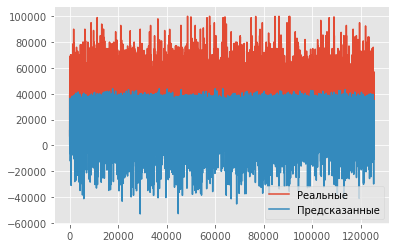

In [106]:
real_pred.reset_index(drop = True).plot()
plt.legend(loc = 'best')

In [107]:
print('Коэффициенты: {}'.format(model.coef_)) #b1,b2,b3
print('Свободный член: {}'.format(model.intercept_)) # a

Коэффициенты: [-1.09813053e+00  6.83442741e+02  1.52229709e+03  1.59808651e+03
 -1.81947582e-05  4.71414876e+03  2.97846106e+03 -3.88580222e+03
 -2.04946590e+03 -1.75734171e+03 -1.92894973e+03  4.20667703e+02
  1.50828202e+03  1.50450359e+03 -3.20179485e+03  1.69729127e+03
 -2.36057797e+03 -3.32647641e+03  4.86648824e+03  3.67205888e+03
 -4.04204999e+03 -4.24775442e+03  3.91664100e+03  2.70812948e+03
  4.79575732e+03 -3.06832628e+03  2.44285991e+03 -1.65188567e+03
 -3.70486409e+03 -6.38403516e+03 -1.37939226e+05]
Свободный член: -1364894.2538502212


In [108]:
print ('R^2 на тренировочной выборке: {0}'.format(model.score(X_train, y_train)))
print ('R^2 на прогнозе: {0}'.format(model.score(X_test, y_test)))

R^2 на тренировочной выборке: 0.4331090216661201
R^2 на прогнозе: 0.4301334649192893


<b>Как результат: Вероятность предсказания цены 43%</b> Проведем повторное моделирование с помощью дерева решений

Анализ статистической значимости

In [109]:
from sklearn.feature_selection import f_regression 
pvalues = f_regression(df_vehicles, Price)[1]
pvalues

array([9.88784914e-022, 0.00000000e+000, 9.04111340e-161, 0.00000000e+000,
       8.94843017e-007, 0.00000000e+000, 1.15553771e-149, 0.00000000e+000,
       4.98702865e-102, 0.00000000e+000, 0.00000000e+000, 2.72705455e-288,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 7.50941501e-006, 2.13699481e-007, 8.74126290e-153,
       0.00000000e+000, 0.00000000e+000, 2.62147620e-001, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 8.07091030e-014,
       1.06981233e-269, 0.00000000e+000, 1.03183379e-003])

In [110]:
coef = pd.DataFrame([tuple(model.coef_), tuple(pvalues)])
coef.columns = [df_vehicles.columns]
coef.index = ['coef', 'pvalues']
coef

,region,year,condition,cylinders,odometer,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,manufacturer_freq_encode,model_freq_encode
coef,-1.098131e+00,683.442741,1.522297e+03,1598.086511,-1.819476e-05,4714.148759,2.978461e+03,-3885.802218,-2.049466e+03,-1757.341708,...,-4247.754421,3916.640996,2708.129483,4795.757322,-3068.326278,2442.859909,-1.651886e+03,-3.704864e+03,-6384.035155,-137939.225707
pvalues,9.887849e-22,0.000000,9.041113e-161,0.000000,8.948430e-07,0.000000,1.155538e-149,0.000000,4.987029e-102,0.000000,...,0.000000,0.262148,0.000000,0.000000,0.000000,0.000000,8.070910e-14,1.069812e-269,0.000000,0.001032


### Дерево решений

In [131]:
from sklearn.tree import DecisionTreeRegressor # Импортируем метод
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Выполним предварительный Grid Search

In [132]:
model_2 = DecisionTreeRegressor(criterion = 'mse')
param_grid_2 = {'max_depth':np.arange(0,100,10), 'min_samples_leaf':np.arange(0,100,10)}

# Задаём разбиение данных на лёрн и тест n_splits раз. Для каждого такого разбиения будет. Кросс-Валидация в соотношении к обучащей 
kfold = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

grid_search_2 = GridSearchCV(model_2, param_grid_2, scoring="r2", cv=kfold, verbose=2, n_jobs=-1)
grid_result_2 = grid_search_2.fit(X_train, y_train)

Fitting 17 folds for each of 100 candidates, totalling 1700 fits


/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=17.
  warnings.warn(("The least populated class in y has only %d"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must b

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 287, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 225, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615

In [133]:
grid_result_2.best_score_

0.7961920448781357

Наилучший результат достигается при следующих параметрах: 

In [134]:
grid_result_2.best_params_

{'max_depth': 70, 'min_samples_leaf': 10}

In [135]:
model_dt = DecisionTreeRegressor(random_state = 42, criterion='mse', max_depth = 70, min_samples_leaf = 10)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=70, min_samples_leaf=10, random_state=42)

In [136]:
y_pred_dt = model_dt.predict(X_test) 

In [137]:
real_pred_dt = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred_dt, 'Абсолютная ошибка': abs(y_pred_dt - y_test)})
real_pred_dt

,Реальные,Предсказанные,Абсолютная ошибка
134134,7495,7253.400000,241.600000
218692,2200,3070.833333,870.833333
379801,7500,6899.631579,600.368421
208400,20588,9510.466667,11077.533333
347213,38990,36578.235294,2411.764706
...,...,...,...
170814,25990,25990.000000,0.000000
390849,29995,30616.083333,621.083333
333654,5800,10559.909091,4759.909091
391661,3200,3441.785714,241.785714


In [138]:
del real_pred_dt ['Абсолютная ошибка'] # Удалим столбец с абсолютной ошибкой перед построением графика

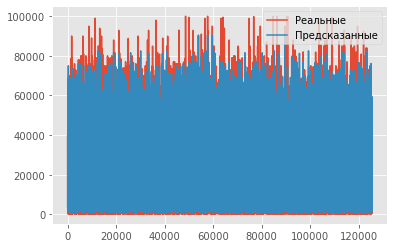

In [139]:
# Также можем сравнить графики
real_pred_dt.reset_index(drop = True).plot()
plt.legend(loc = 'upper right')

In [140]:
pd.DataFrame({'feature': df_vehicles.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
1,year,0.397569
4,odometer,0.146580
14,drive_fwd,0.145444
5,fuel_diesel,0.066356
3,cylinders,0.065385
29,manufacturer_freq_encode,0.053146
30,model_freq_encode,0.039984
2,condition,0.013560
0,region,0.011338
24,type_pickup,0.010774


<AxesSubplot:>

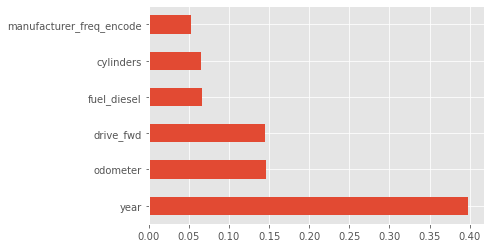

In [141]:
pd.Series(model_dt.feature_importances_, index = df_vehicles.columns).nlargest(6).plot(kind='barh')

In [142]:
from sklearn.metrics import r2_score # Для расчете R^2 в модели случаных лесов
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_dt)))

R^2 на прогнозе: 0.7966309251236401
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.1s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=50; total time=

[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.1s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................

[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.1s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=50; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=50; total time=   0.0s
[CV] END ...................

[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.1s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ....................max_depth=0, min_samples_leaf=0; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=10; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=0, min_samples_leaf=40; total time=   0.0s
[CV] END ...................

<b>Как результат: Вероятность предсказания цены 79,6%</b> Результат довольно хороший. Проведем заключительное моделирование с помощью метода "Случайный лес"

### Случайный лес

In [120]:
from sklearn.ensemble import RandomForestRegressor

Выполним предварительный Grid Search

In [155]:
model_3 = RandomForestRegressor(criterion = 'mse')
param_grid_3 = {'max_depth':np.arange(0,200,30), 'n_estimators':np.arange(0,200,30)}

# Задаём разбиение данных на лёрн и тест n_splits раз. Для каждого такого разбиения будет. Кросс-Валидация в соотношении к обучащей 
kfold = StratifiedKFold(n_splits=17, shuffle=True, random_state=42)

grid_search_3 = GridSearchCV(model_3, param_grid_3, scoring="r2", cv=kfold, verbose=2, n_jobs=-1)
grid_result_3 = grid_search_3.fit(X_train, y_train)

Fitting 17 folds for each of 7 candidates, totalling 119 fits


/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=17.
  warnings.warn(("The least populated class in y has only %d"
/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packag

/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packag

KeyboardInterrupt: 

In [ ]:
grid_result_3.best_score_

Наилучший показатель достигается при следующих параметрах:

In [ ]:
grid_result_3.best_params_

In [145]:
rf = RandomForestRegressor(random_state = 42, # параметр для воспроизводимости результатов
                           criterion = 'mse',    
                           n_estimators = 170,  # число деревьев в лесу
                               max_depth = 70, # максимальная глубина дерева
                               oob_score = True) # Вычислять out-of-bag ошибку

In [146]:
rf.fit(X_train, y_train) # Методом .fit тренируем модель

RandomForestRegressor(max_depth=70, n_estimators=170, oob_score=True,
                      random_state=42)

In [147]:
y_pred_rf = rf.predict(X_test) # Методом .predict предсказываем по модели

In [148]:
real_pred_rf = pd.DataFrame({'Реальные': y_test, 'Предсказанные': y_pred_rf, 'Абсолютная ошибка': abs(y_pred_rf - y_test)})
real_pred_rf

,Реальные,Предсказанные,Абсолютная ошибка
134134,7495,7493.550980,1.449020
218692,2200,2535.564706,335.564706
379801,7500,6225.235294,1274.764706
208400,20588,15805.211765,4782.788235
347213,38990,38136.523529,853.476471
...,...,...,...
170814,25990,25990.000000,0.000000
390849,29995,29914.423529,80.576471
333654,5800,7676.323529,1876.323529
391661,3200,3883.541176,683.541176


In [149]:
del real_pred_rf ['Абсолютная ошибка'] # Удалим столбец с абсолютной ошибкой перед построением графика

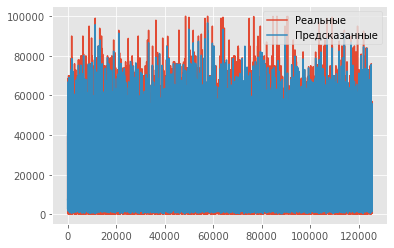

In [150]:
# Также можем сравнить графики
real_pred_rf.reset_index(drop = True).plot()
plt.legend(loc = 'upper right')

In [151]:
pd.DataFrame({'feature': df_vehicles.columns,
              'importance': rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
1,year,0.357598
4,odometer,0.158045
14,drive_fwd,0.122555
3,cylinders,0.063463
5,fuel_diesel,0.058949
29,manufacturer_freq_encode,0.058563
30,model_freq_encode,0.057917
0,region,0.031920
2,condition,0.015317
24,type_pickup,0.010484


<AxesSubplot:>

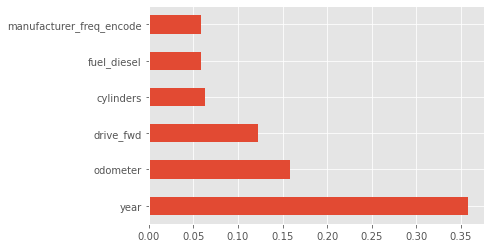

In [152]:
pd.Series(rf.feature_importances_, index = df_vehicles.columns).nlargest(6).plot(kind='barh')

In [153]:
print ('R^2 на прогнозе: {0}'.format(r2_score(y_test, y_pred_rf)))

R^2 на прогнозе: 0.8782653608543809


<b>Как результат: Вероятность предсказания цены 88%</b> Прекрасный результат. Вполне реально его увеличить, при наличии больших мощностей
    
Стоит отметить, что особое влияние на формирование цены, по мнению модели, влияет: в первую очередь год производства, что не лишено смысло. Обычно самые новые автомобили имеют преимущество в цене над прошлыми моделями. Так же существуют раритетные автомобили. 

На втором месте Пробег. Действительно, чем меньше пробег, тем выше стоимость автомобиля, так как меньше изношены механизмы.
Немаловажными факторами все так же остаются тип двигателя (тип топлива, тип привода и кол-во цилиндров), а так же производитель. Вероятнее всего цена на китайский Haval будет на 10-15% дешевле, чем цена на Ford или BMW